In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")

In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Item Weight Imputation

<AxesSubplot:xlabel='Item_Weight'>

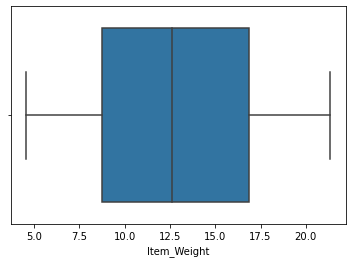

In [8]:
sns.boxplot('Item_Weight',data= train)

<AxesSubplot:xlabel='Item_Weight'>

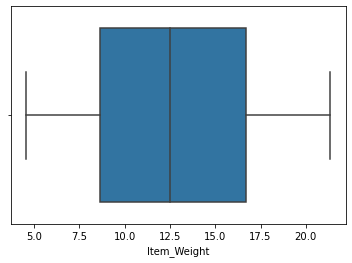

In [9]:
sns.boxplot('Item_Weight',data= test)

In [10]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

### Outlet Size Imputation

In [11]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [12]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Exploratory Data Analysis

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

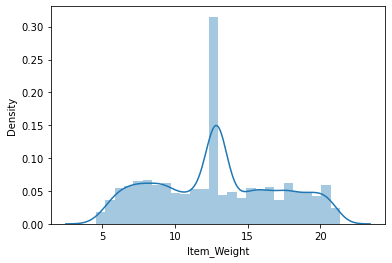

In [14]:
#Item Weight Distribution
sns.distplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

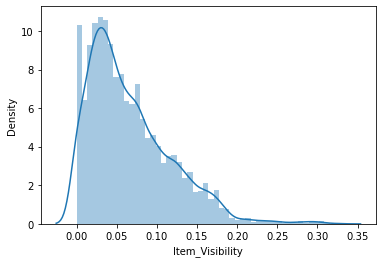

In [15]:
#Item Visibility Distribution
sns.distplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

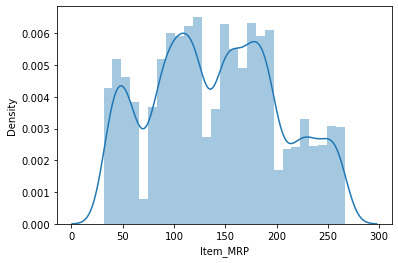

In [16]:
#Item Item_MRP Distribution
sns.distplot(train['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

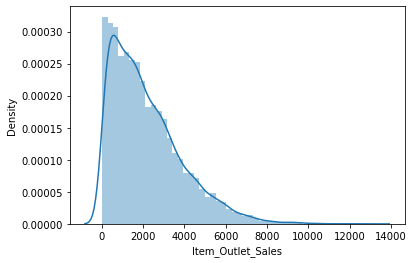

In [17]:
#Item_Outlet_Sales Distribution
sns.distplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

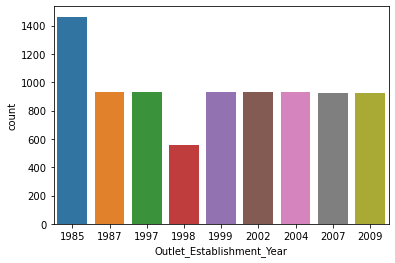

In [18]:
#Outlet_Establishment_Year Distribution
sns.countplot(x='Outlet_Establishment_Year',data=train)

### Item Fat Content

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
train['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Low Fat','Regular'],inplace=True)
test['Item_Fat_Content'].replace(['LF','reg','low fat'],['Low Fat','Low Fat','Regular'],inplace=True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

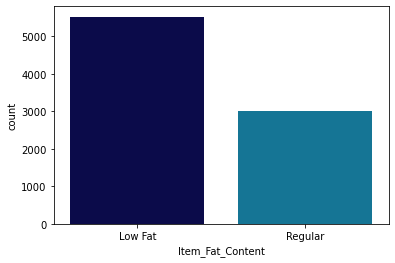

In [21]:
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

### Item Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

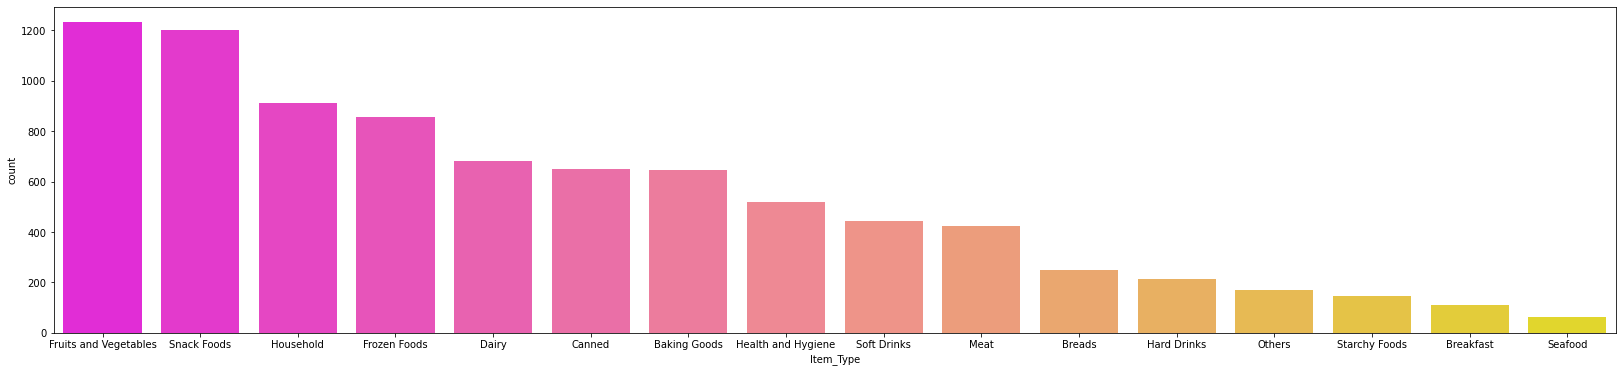

In [22]:
plt.figure(figsize=(28,6))
sns.countplot('Item_Type',data=train,palette='spring',order=train['Item_Type'].value_counts().index)

### Outlet Size 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

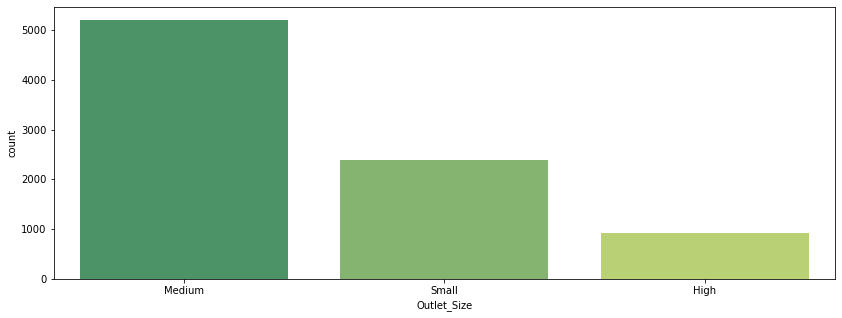

In [23]:
plt.figure(figsize=(14,5))
sns.countplot('Outlet_Size',data=train,palette='summer',order=train['Outlet_Size'].value_counts().index)

### Outlet Location Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

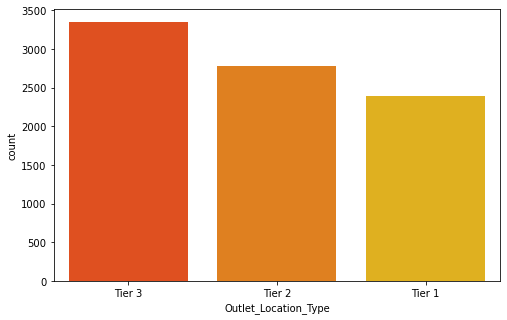

In [24]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn',order=train['Outlet_Location_Type'].value_counts().index)

In [25]:
train.corr().style.background_gradient(cmap="Blues")


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [26]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Let's build a model


In [27]:
# Label Encoding

le = LabelEncoder()
# taking categorical columns
cat_cols =['Item_Identifier', 'Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type']

In [28]:
for i in cat_cols:
    train[i] = le.fit_transform(train[i])
    
for i in cat_cols:
    test[i] = le.fit_transform(test[i])

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,Grocery Store,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052


In [30]:
# One Hot Encoding for Outlet Type since, it is slightly correlated.
train = pd.get_dummies(train,columns=['Outlet_Type'])
test = pd.get_dummies(test,columns=['Outlet_Type'])

In [31]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,3735.1380,0,1,0,0
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,443.4228,0,0,1,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,2097.2700,0,1,0,0
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,732.3800,1,0,0,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,994.7052,0,1,0,0


In [32]:
#Let's split training and test data

X= train.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year',],axis=1)
y=train['Item_Outlet_Sales']

In [33]:
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

# Linear Regression

In [34]:
LR  = LinearRegression()

In [35]:
LR.fit(X_train,y_train)

LinearRegression()

In [36]:
#Prediction on training data
training_data_prediction = LR.predict(X_train)

In [37]:
# R -Squared on training prediction

r2_train = metrics.r2_score(y_train,training_data_prediction)
print(' R -Squared on training prediction....',r2_train)

 R -Squared on training prediction.... 0.5647562777599748


In [38]:
#Prediction on testing data
test_data_prediction = LR.predict(X_test)

In [39]:
# R -Squared on testing prediction

r2_test = metrics.r2_score(y_test,test_data_prediction)
print(' R -Squared on testing prediction....',r2_test)

 R -Squared on testing prediction.... 0.5565090814965394


In [40]:
#Mean Squared Error
MSE= metrics.mean_squared_error(y_test,test_data_prediction)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1139.218798474548


In [41]:
test_dummied= test.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year',],axis=1)

In [42]:
test_dummied.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0,0.007565,13,107.8622,1,0,0,1,0,0
1,8.300000,0,0.038428,4,87.3198,1,1,0,1,0,0
2,14.600000,0,0.099575,11,241.7538,1,2,1,0,0,0
3,7.315000,0,0.015388,13,155.0340,1,1,0,1,0,0
4,12.695633,1,0.118599,4,234.2300,1,2,0,0,0,1


In [43]:

submission = pd.read_csv('sample_submission_8RXa3c6.csv')
final_predictions = LR.predict(test_dummied)

submission['Item_Outlet_Sales'] = final_predictions

#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)